# Assignment 4-2: Implementation of Matrix in Image Processing

The objective of this exercise is getting practice in operating with matrices – creating,
multiplying, convolving, pooling, and visualisation.

The solution could be used later as a stage of a more complex image recognition process.



The task is to create a program to

**a) enter a grey scale pixel matrix [32, 32] with random colour values (using real image)**

**b) filter it by convolutional multiplication with a sparse matrix for discovering vertical lines**

**c) reshape it by applying max-pool method with size [2x2] and stride of 2**

**d) show the result**


# Task A)
Enter a grey scale pixel matrix [32, 32] with random colour values 

**We are using a real image instead, and scale it to 320x320px**

Image before resizing:


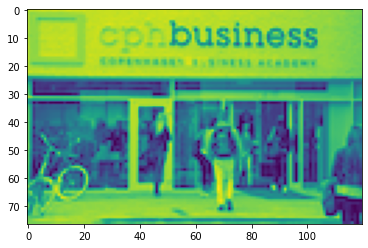

image size:  (77, 120)
pixel matrix:
 [[206 210 209 ... 188 186 185]
 [201 193 194 ... 187 186 185]
 [204 194 197 ... 184 184 182]
 ...
 [177 168 169 ...  26   0 110]
 [182 186 194 ...  24   0  98]
 [187 185 185 ...  19   0  61]]

New image:


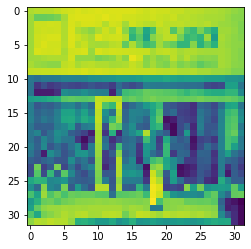

image size:  (32, 32)
pixel matrix:
 [[198 202 202 ... 194 190 186]
 [193 174 174 ... 191 186 185]
 [194 208 208 ... 191 188 183]
 ...
 [130 172 188 ...  21  28   8]
 [165 136 179 ...  61  31   8]
 [188 200 198 ... 137  31   8]]


In [81]:
#!pip install opencv-python # download dependency to cv2
import cv2  # works with images (from python-opencv)

#!pip install matplotlib
from matplotlib import pyplot  # for visualisation
# load your image, 0 is for grey scale mode
img = cv2.imread('cbh_image.png', 0)

# visualisation function
def show_image(image):
    # image view
    pyplot.imshow(image)
    pyplot.show()
    # pixel view
    print('image size: ', image.shape)
    print('pixel matrix:\n', image)


# show the original image
print("Image before resizing:")
show_image(img)
# resize the image
SIZE = 32
img_resized = cv2.resize(img, (SIZE, SIZE))
# show the resized image
print("\nNew image:")
myimage(img_resized)


# Task B)
Filter it by convolutional multiplication with a sparse matrix for discovering vertical lines

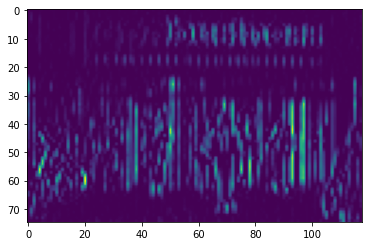

In [96]:
#To filter the image we need a kernel
#in this case a 3x3 matrix looking for vertical lines
kernel = [[-1,2,-1],
          [-1,2,-1],
          [-1,2,-1]]

## alternate kernel (rename to kernel to try)
kernel_horizontal = [[-1,-1,-1],
                     [2,2,2],
                     [-1,-1,-1]]

## alternate kernel (rename to kernel to try)
kernel_diagonal = [[2,-1,-1],
                  [-1,2,-1],
                  [-1,-1,2]]


# array to hold rows of the feature map generated by the convolution
feature_map = []

# we now need to go through the image and do the
# convolutional multiplication
for i in range(len(img)): 
    # array to hold temp row in feature map
    # reset each iteration of columns
    feature_temp = []
    
    for j in range(len(img[i])):
        
        # Checks if the kernel is within the image boundaries
        if i-1 >= 0 and i+1 < len(img) and j-1 >= 0 and j+1 < len(img[i]):
            
            # convolutional multiplication with kernel
            temp = img[i-1][j-1] * kernel[0][0] + img[i-1][j] * kernel[0][1] + img[i-1][j+1] * kernel[0][2] + img[i][j-1] * kernel[1][0] + img[i][j] * kernel[1][1] + img[i][j+1] * kernel[1][2] + img[i+1][j-1] * kernel[2][0] + img[i+1][j] * kernel[2][1] + img[i+1][j+1] * kernel[2][2]
            
            # lower limit (remove negative numbers)
            if temp < 0:
                temp = 0
            
            # append number to row
            feature_temp.append(temp)
        
    # add the row to the feature map array
    # if it's not empty
    if feature_temp != []:
        feature_map.append(feature_temp)

 # showing the feature map (vertical highlight)
pyplot.imshow(feature_map)
pyplot.show()

# Task C)
reshape it by applying max-pool method with size [2x2] and stride of 2

In [94]:
# This method can do a max_pool on a greyscale image (2 dim array)
# it takes an img as 2 dim. array
# a filter size as int (2 = 2x2 matrix etc)
# a stride, as int, that descripes how long the filter 
# should jump each iteration
def max_pool(img, filter_size, stride):
    
    # array to hold the max-pooled image
    max_pool_array = []
    
    # we now need to go through the image and do the
    # max-pooling
    for i in range(0, len(img), stride): 
        # temp row for the max pool array
        max_row_temp = []

        for j in range(0, len(img[i]), stride):
            
            # checks if the filter is within the image
            if i >=0 and i+filter_size < len(img) and j >=0 and j+filter_size < len(img[i]):
                
                max_number = 0
                
                # finding the biggest number within the filter
                for k in range(filter_size):
                    for l in range(filter_size):
                        # comparing filter pos in img with current
                        # biggest number in filter
                        if max_number < img[i+k][j+l]:
                            max_number = img[i+k][j+l]
                
                # add biggest number in filter to max-pool row
                max_row_temp.append(max_number)
                
        
        # add max-pool row to max-pooled image array
        # if it's not empty
        if max_row_temp != []:
            max_pool_array.append(max_row_temp)
    
    # return the max-pooled image
    return max_pool_array



# Task D)
show the result

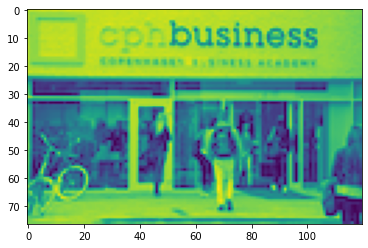

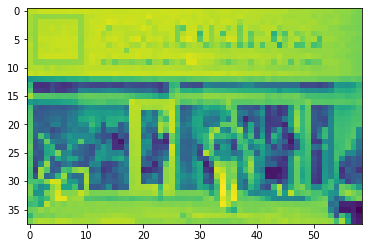

In [97]:
# Showing the original image for comparison
pyplot.imshow(img)
pyplot.show()

# calling our max_pool method from earlier
img_max_pooled = max_pool(img, 2, 2)

# Showing the new smaller image that has
# been max-pooled
pyplot.imshow(img_max_pooled)
pyplot.show()